In [400]:
import numpy as np

In [401]:
import math

In [402]:
import matplotlib.pyplot as plt

In [403]:
import sympy

In [404]:
from sympy import *

In [405]:
import matplotlib.animation as animation

In [406]:
import random

In [407]:
n1 = 0
n2 = 0
n3 = 1
s1 = 1
s2 = 0
s3 = 0
C = Symbol('C')
S = Symbol('S')

T = sympy.Matrix([[n1**(2)*(1-C)+C, n1*n2*(1-C)-n3*S, n1*n3*(1-C)+n2*S], 
            [n1*n2*(1-C)+n3*S, n2**(2)*(1-C)+C, n2*n3*(1-C)-n1*S], 
            [n1*n3*(1-C)-n2*S, n2*n3*(1-C)+n1*S, n3**(2)*(1-C)+C]])

s = sympy.Matrix([[s1], [s2], [s3]])

h = T*s

print(h)

Matrix([[C], [S], [0]])


In [408]:
C = Symbol('C')
S = Symbol('S')

k_0 = Symbol('k_0')
k_U = Symbol('k_U')
k_V = Symbol('k_V')
k_X = Symbol('k_X')
k_Y = Symbol('k_Y')
k_Z = Symbol('k_Z')
XX = Symbol('XX')
XY = Symbol('XY')
YY = Symbol('YY')
YZ = Symbol('YZ')
ZZ = Symbol('ZZ')
ZX = Symbol('ZX')

K = sympy.Matrix([[XX, XY, ZX], [XY, YY, YZ], [ZX, YZ, ZZ]])

R2 = Matrix([[np.cos(np.radians(-120)), -np.sin(np.radians(-120)), 0], [np.sin(np.radians(-120)), np.cos(np.radians(-120)), 0], [0, 0, 1]])
R3 = Matrix([[np.cos(np.radians(120)), -np.sin(np.radians(120)), 0], [np.sin(np.radians(120)), np.cos(np.radians(120)), 0], [0, 0, 1]])

H = sympy.Matrix([[C, S, 0]]) 
h = sympy.Matrix([[C], [S], [0]])

K1 = H*K*h
K2 = H*R2*K*R2**(-1)*h
K3 = H*R3*K*R3**(-1)*h

print(K1)
print(K2)
print(K3)

Matrix([[C*(C*XX + S*XY) + S*(C*XY + S*YY)]])
Matrix([[C*(-0.5*XX*(-0.5*C - 0.866025403784439*S) + 0.866025403784439*XY*(-0.5*C - 0.866025403784439*S) - 0.5*XY*(0.866025403784439*C - 0.5*S) + 0.866025403784439*YY*(0.866025403784439*C - 0.5*S)) + S*(-0.866025403784439*XX*(-0.5*C - 0.866025403784439*S) - 0.5*XY*(-0.5*C - 0.866025403784439*S) - 0.866025403784439*XY*(0.866025403784439*C - 0.5*S) - 0.5*YY*(0.866025403784439*C - 0.5*S))]])
Matrix([[C*(-0.5*XX*(-0.5*C + 0.866025403784439*S) - 0.5*XY*(-0.866025403784439*C - 0.5*S) - 0.866025403784439*XY*(-0.5*C + 0.866025403784439*S) - 0.866025403784439*YY*(-0.866025403784439*C - 0.5*S)) + S*(0.866025403784439*XX*(-0.5*C + 0.866025403784439*S) + 0.866025403784439*XY*(-0.866025403784439*C - 0.5*S) - 0.5*XY*(-0.5*C + 0.866025403784439*S) - 0.5*YY*(-0.866025403784439*C - 0.5*S))]])


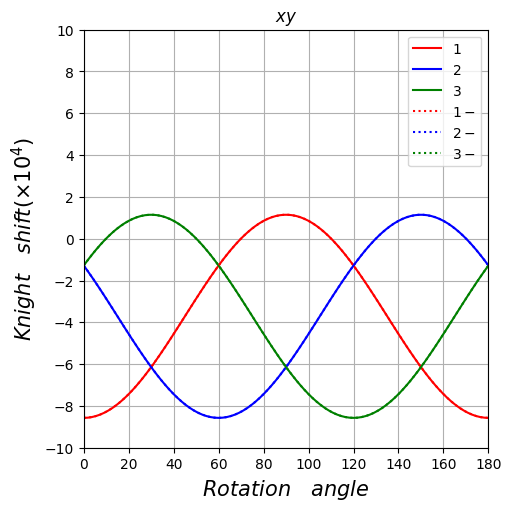

In [409]:
fig, axes = plt.subplots(1, 1, figsize=(5, 5), constrained_layout=True)
axes.set_title(r"$xy$")
axes.set_xlabel(r"$Rotation \quad angle$", fontsize=15) 
axes.set_ylabel(r"$Knight \quad shift(\times 10^{4})$", fontsize=15)

axes.set_xlim([0, 180])
axes.set_ylim([-10, 10])
axes.set_xticks(np.linspace(0, 180, 10))
axes.set_yticks(np.linspace(-10, 10, 11))
axes.grid()

x = np.linspace(0, 180, 100)

XX = (-8.572)*10**(-4)
YY = (1.146)*10**(-4)
ZZ = 0
XY = 0
YZ = (8.830)*10**(-4)
ZX = 0
C = np.cos(np.radians(x))
S = np.sin(np.radians(x))

def xy1(x):
    return C*(C*XX + S*XY) + S*(C*XY + S*YY)

def xy2(x):
    return C*(-0.5*XX*(-0.5*C - 0.866025403784439*S) + 0.866025403784439*XY*(-0.5*C - 0.866025403784439*S) - 0.5*XY*(0.866025403784439*C - 0.5*S) + 0.866025403784439*YY*(0.866025403784439*C - 0.5*S)) + S*(-0.866025403784439*XX*(-0.5*C - 0.866025403784439*S) - 0.5*XY*(-0.5*C - 0.866025403784439*S) - 0.866025403784439*XY*(0.866025403784439*C - 0.5*S) - 0.5*YY*(0.866025403784439*C - 0.5*S))

def xy3(x):
    return C*(-0.5*XX*(-0.5*C + 0.866025403784439*S) - 0.5*XY*(-0.866025403784439*C - 0.5*S) - 0.866025403784439*XY*(-0.5*C + 0.866025403784439*S) - 0.866025403784439*YY*(-0.866025403784439*C - 0.5*S)) + S*(0.866025403784439*XX*(-0.5*C + 0.866025403784439*S) + 0.866025403784439*XY*(-0.866025403784439*C - 0.5*S) - 0.5*XY*(-0.5*C + 0.866025403784439*S) - 0.5*YY*(-0.866025403784439*C - 0.5*S))

def XY1(x):
    return (XX+YY)/2+(XX-YY)/2*np.cos(2*np.radians(x))

def XY2r(x):
    return (XX+YY)/2+(XX-YY)/2*np.cos(2*np.radians(x) + np.pi * 4/3 )

def XY2l(x):
    return (XX+YY)/2+(XX-YY)/2*np.cos(2*np.radians(x) - np.pi * 4/3 )

def XY3r(x):
    return (XX+YY)/2+(XX-YY)/2*np.cos(2*np.radians(x) - np.pi * 4/3 )

def XY3l(x):
    return (XX+YY)/2+(XX-YY)/2*np.cos(2*np.radians(x) + np.pi * 4/3 )

ims=[]
im1 = axes.plot(x, xy1(x)*10**(4), color='red')
im2 = axes.plot(x, xy2(x)*10**(4), color='blue')
im3 = axes.plot(x, xy3(x)*10**(4), color='green')
im4 = axes.plot(x, XY1(x)*10**(4), ":", color='red')
im5 = axes.plot(x, XY2r(x)*10**(4), ":", color='blue')
im6 = axes.plot(x, XY3r(x)*10**(4), ":", color='green')

axes.legend(['$1$','$2$', '$3$', '$1-$','$2-$', '$3-$'])

plt.show()

In [410]:
n1 = -1
n2 = 0
n3 = 0
s1 = 0
s2 = 0
s3 = 1
C = Symbol('C')
S = Symbol('S')

T = sympy.Matrix([[n1**(2)*(1-C)+C, n1*n2*(1-C)-n3*S, n1*n3*(1-C)+n2*S], 
            [n1*n2*(1-C)+n3*S, n2**(2)*(1-C)+C, n2*n3*(1-C)-n1*S], 
            [n1*n3*(1-C)-n2*S, n2*n3*(1-C)+n1*S, n3**(2)*(1-C)+C]])

s = sympy.Matrix([[s1], [s2], [s3]])

h = T*s

print(h)

Matrix([[0], [S], [C]])


In [411]:
C = Symbol('C')
S = Symbol('S')

k_0 = Symbol('k_0')
k_U = Symbol('k_U')
k_V = Symbol('k_V')
k_X = Symbol('k_X')
k_Y = Symbol('k_Y')
k_Z = Symbol('k_Z')
XX = Symbol('XX')
XY = Symbol('XY')
YY = Symbol('YY')
YZ = Symbol('YZ')
ZZ = Symbol('ZZ')
ZX = Symbol('ZX')

K = sympy.Matrix([[XX, XY, ZX], [XY, YY, YZ], [ZX, YZ, ZZ]])

R2 = Matrix([[np.cos(np.radians(-120)), -np.sin(np.radians(-120)), 0], [np.sin(np.radians(-120)), np.cos(np.radians(-120)), 0], [0, 0, 1]])
R3 = Matrix([[np.cos(np.radians(120)), -np.sin(np.radians(120)), 0], [np.sin(np.radians(120)), np.cos(np.radians(120)), 0], [0, 0, 1]])

H = sympy.Matrix([[0, S, C]]) 
h = sympy.Matrix([[0], [S], [C]])

K1 = H*K*h
K2 = H*R2*K*R2**(-1)*h
K3 = H*R3*K*R3**(-1)*h

print(K1)
print(K2)
print(K3)

Matrix([[C*(C*ZZ + S*YZ) + S*(C*YZ + S*YY)]])
Matrix([[C*(C*ZZ - 0.5*S*YZ - 0.866025403784439*S*ZX) + S*(-0.5*C*YZ - 0.866025403784439*C*ZX + 0.75*S*XX + 0.866025403784438*S*XY + 0.25*S*YY)]])
Matrix([[C*(C*ZZ - 0.5*S*YZ + 0.866025403784439*S*ZX) + S*(-0.5*C*YZ + 0.866025403784439*C*ZX + 0.75*S*XX - 0.866025403784438*S*XY + 0.25*S*YY)]])


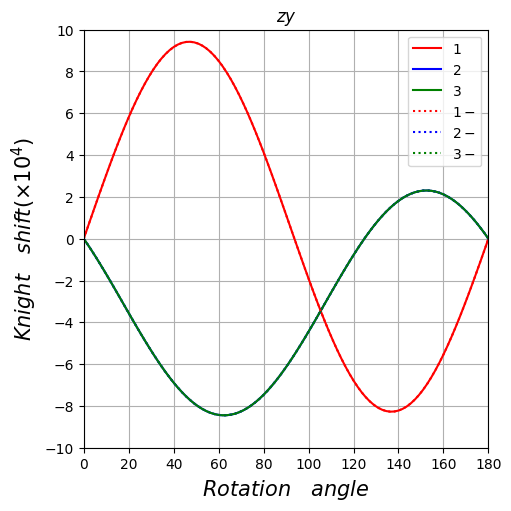

In [412]:
fig, axes = plt.subplots(1, 1, figsize=(5, 5), constrained_layout=True)
axes.set_title(r"$zy$")
axes.set_xlabel(r"$Rotation \quad angle$", fontsize=15) 
axes.set_ylabel(r"$Knight \quad shift(\times 10^{4})$", fontsize=15)

axes.set_xlim([0, 180])
axes.set_ylim([-10, 10])
axes.set_xticks(np.linspace(0, 180, 10))
axes.set_yticks(np.linspace(-10, 10, 11))
axes.grid()

x = np.linspace(0, 180, 100)

XX = (-8.572)*10**(-4)
YY = (1.146)*10**(-4)
ZZ = 0
XY = 0
YZ = (8.830)*10**(-4)
ZX = 0
C = np.cos(np.radians(x))
S = np.sin(np.radians(x))

def zy1(x):
    return C*(C*ZZ + S*YZ) + S*(C*YZ + S*YY)

def zy2(x):
    return C*(C*ZZ - 0.5*S*YZ - 0.866025403784439*S*ZX) + S*(-0.5*C*YZ - 0.866025403784439*C*ZX + 0.75*S*XX + 0.866025403784438*S*XY + 0.25*S*YY)

def zy3(x):
    return C*(C*ZZ - 0.5*S*YZ + 0.866025403784439*S*ZX) + S*(-0.5*C*YZ + 0.866025403784439*C*ZX + 0.75*S*XX - 0.866025403784438*S*XY + 0.25*S*YY)

def ZY1r(x):
    return (ZZ+YY)/2+(ZZ-YY)/2*np.cos(2*np.radians(x)) + YZ*np.sin(2*np.radians(x))

def ZY23r(x):
    return (4*ZZ+3*XX+YY)/8+(4*ZZ-(3*XX+YY))/8*np.cos(2*np.radians(x))-YZ/2*np.sin(2*np.radians(x))

ims=[]
im1 = axes.plot(x, zy1(x)*10**(4), color='red')
im2 = axes.plot(x, zy2(x)*10**(4), color='blue')
im3 = axes.plot(x, zy3(x)*10**(4), color='green')
im4 = axes.plot(x, ZY1r(x)*10**(4), ":", color='red')
im5 = axes.plot(x, ZY23r(x)*10**(4), ":", color='blue')
im6 = axes.plot(x, ZY23r(x)*10**(4), ":", color='green')

axes.legend(['$1$','$2$', '$3$', '$1-$','$2-$', '$3-$'])

plt.show()

In [413]:
n1 = 0
n2 = 1
n3 = 0
s1 = 0
s2 = 0
s3 = 1
C = Symbol('C')
S = Symbol('S')

T = sympy.Matrix([[n1**(2)*(1-C)+C, n1*n2*(1-C)-n3*S, n1*n3*(1-C)+n2*S], 
            [n1*n2*(1-C)+n3*S, n2**(2)*(1-C)+C, n2*n3*(1-C)-n1*S], 
            [n1*n3*(1-C)-n2*S, n2*n3*(1-C)+n1*S, n3**(2)*(1-C)+C]])

s = sympy.Matrix([[s1], [s2], [s3]])

h = T*s

print(h)

Matrix([[S], [0], [C]])


In [414]:
C = Symbol('C')
S = Symbol('S')

k_0 = Symbol('k_0')
k_U = Symbol('k_U')
k_V = Symbol('k_V')
k_X = Symbol('k_X')
k_Y = Symbol('k_Y')
k_Z = Symbol('k_Z')
XX = Symbol('XX')
XY = Symbol('XY')
YY = Symbol('YY')
YZ = Symbol('YZ')
ZZ = Symbol('ZZ')
ZX = Symbol('ZX')

K = sympy.Matrix([[XX, XY, ZX], [XY, YY, YZ], [ZX, YZ, ZZ]])

R2 = Matrix([[np.cos(np.radians(-120)), -np.sin(np.radians(-120)), 0], [np.sin(np.radians(-120)), np.cos(np.radians(-120)), 0], [0, 0, 1]])
R3 = Matrix([[np.cos(np.radians(120)), -np.sin(np.radians(120)), 0], [np.sin(np.radians(120)), np.cos(np.radians(120)), 0], [0, 0, 1]])

H = sympy.Matrix([[S, 0, C]]) 
h = sympy.Matrix([[S], [0], [C]])

K1 = H*K*h
K2 = H*R2*K*R2**(-1)*h
K3 = H*R3*K*R3**(-1)*h

print(K1)
print(K2)
print(K3)

Matrix([[C*(C*ZZ + S*ZX) + S*(C*ZX + S*XX)]])
Matrix([[C*(C*ZZ + 0.866025403784439*S*YZ - 0.5*S*ZX) + S*(0.866025403784439*C*YZ - 0.5*C*ZX + 0.25*S*XX - 0.866025403784438*S*XY + 0.75*S*YY)]])
Matrix([[C*(C*ZZ - 0.866025403784439*S*YZ - 0.5*S*ZX) + S*(-0.866025403784439*C*YZ - 0.5*C*ZX + 0.25*S*XX + 0.866025403784438*S*XY + 0.75*S*YY)]])


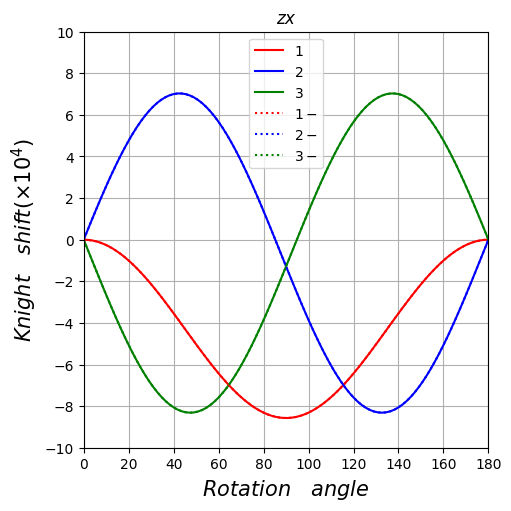

In [415]:
fig, axes = plt.subplots(1, 1, figsize=(5, 5), constrained_layout=True)
axes.set_title(r"$zx$")
axes.set_xlabel(r"$Rotation \quad angle$", fontsize=15) 
axes.set_ylabel(r"$Knight \quad shift(\times 10^{4})$", fontsize=15)

axes.set_xlim([0, 180])
axes.set_ylim([-10, 10])
axes.set_xticks(np.linspace(0, 180, 10))
axes.set_yticks(np.linspace(-10, 10, 11))
axes.grid()

x = np.linspace(0, 180, 100)

XX = (-8.572)*10**(-4)
YY = (1.146)*10**(-4)
ZZ = 0
XY = 0
YZ = (8.830)*10**(-4)
ZX = 0
C = np.cos(np.radians(x))
S = np.sin(np.radians(x))

def zx1(x):
    return C*(C*ZZ + S*ZX) + S*(C*ZX + S*XX)

def zx2(x):
    return C*(C*ZZ + 0.866025403784439*S*YZ - 0.5*S*ZX) + S*(0.866025403784439*C*YZ - 0.5*C*ZX + 0.25*S*XX - 0.866025403784438*S*XY + 0.75*S*YY)

def zx3(x):
    return C*(C*ZZ - 0.866025403784439*S*YZ - 0.5*S*ZX) + S*(-0.866025403784439*C*YZ - 0.5*C*ZX + 0.25*S*XX + 0.866025403784438*S*XY + 0.75*S*YY)

def ZX1(x):
    return (ZZ+XX)/2+(ZZ-XX)/2*np.cos(2*np.radians(x))

def ZX2(x):
    return (4*ZZ+XX+3*YY)/8+(4*ZZ-(XX+3*YY))/8*np.cos(2*np.radians(x))+3**(1/2)/2*YZ*np.sin(2*np.radians(x))

def ZX3(x):
    return (4*ZZ+XX+3*YY)/8+(4*ZZ-(XX+3*YY))/8*np.cos(2*np.radians(x))-3**(1/2)/2*YZ*np.sin(2*np.radians(x))

ims=[]
im1 = axes.plot(x, zx1(x)*10**(4), color='red')
im2 = axes.plot(x, zx2(x)*10**(4), color='blue')
im3 = axes.plot(x, zx3(x)*10**(4), color='green')
im4 = axes.plot(x, ZX1(x)*10**(4), ":", color='red')
im5 = axes.plot(x, ZX2(x)*10**(4), ":", color='blue')
im6 = axes.plot(x, ZX3(x)*10**(4), ":", color='green')

axes.legend(['$1$','$2$', '$3$', '$1-$','$2-$', '$3-$'])

plt.show()